## Transformacion de variables para conseguir una relacion no lineal
> Si el grafico no nos muestra una forma lineal tendremos que cambiar nuestro modelo

La variable a predecir el gasto de gasolina esta fuertemente relacionada con los caballos de fuerza
entre más caballos de fuerza tiene mayor es el número de gasolina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## importamos data
##mpg consumo
##cylenders: tipo de coche

data=pd.read_csv("archivos/auto.svg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
## limpiar data
## qutiar na
data["mpg"]=data["mpg"].dropna()
data["horsepowe"]=data["horsepower"].dropna()

Text(0.5, 1.0, 'Consumo por caballos de fuerza')

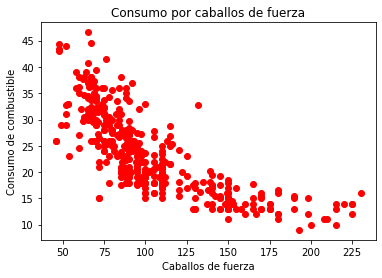

In [4]:
%matplotlib inline
plt.plot(data["horsepower"], data["mpg"], "ro")
plt.xlabel("Caballos de fuerza")
plt.ylabel("Consumo de combustible")
plt.title("Consumo por caballos de fuerza")

## Conclusion del gráfico anterior
* Poca posibilidad de tener forma lineal
* Curva, posiblemente exponencial
* Posiblemente cuadrática en forma de parabola

### Modelo de regresión lineal 
> Probar si se puede ajustar a un modelo lineal
> 
**beta=a+b*horsepower**

In [5]:
x=data["horsepower"].fillna(data["horsepower"].mean())
y=data["mpg"].fillna(data["mpg"].mean())

In [6]:
from sklearn.linear_model  import LinearRegression

In [7]:
lm=LinearRegression()
lm.fit(x[:, np.newaxis],y)

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/361285572.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(x[:, np.newaxis],y)


LinearRegression()

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/3530397439.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(x, lm.predict(x[:, np.newaxis]))


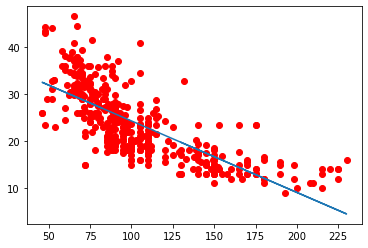

In [8]:
%matplotlib inline
plt.plot(x, y, "ro")
plt.plot(x, lm.predict(x[:, np.newaxis]))

In [9]:
lm.score(x[:, np.newaxis],y)

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/3191482549.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.score(x[:, np.newaxis],y)


0.574653340645025

In [10]:
x_data=x[:, np.newaxis]


C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/4155713015.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data=x[:, np.newaxis]


In [11]:
prediccion=lm.predict(x_data)

In [12]:
lm.coef_, lm.intercept_

(array([-0.15244505]), 39.53387982903449)

In [13]:
## Suma de los cuadrados de las diferencias
SSD=np.sum((y-lm.predict(x[:, np.newaxis]))**2)
RSE=np.sqrt(SSD/(len(data)-1))
error=RSE/y.mean()
SSD, RSE, y.mean(), error

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/866577246.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  SSD=np.sum((y-lm.predict(x[:, np.newaxis]))**2)


(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

In [14]:
## Desviación estandar de los residuos
RSE=np.sqrt(SSD/(len(data)-1))
RSE

5.046879480825511

In [15]:
error=RSE/x.mean()
error

0.04802778274998703

In [16]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'horsepowe'],
      dtype='object')

## Modelo de regresición cuadrática

In [17]:
## hacer el cuadrado de la variable predictoria
x_data=x**2

In [18]:
x_shape=np.reshape(np.array(x_data.to_list()), (len(x_data), 1))

In [19]:
lm_cuadrado=LinearRegression()
lm_cuadrado.fit(x_shape, y)

LinearRegression()

In [20]:
prediccion_cuadratica=lm_cuadrado.predict(x_shape)

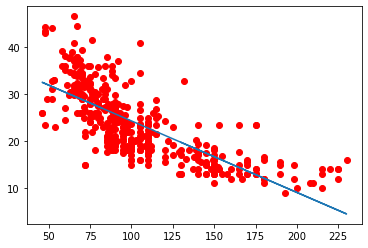

In [21]:
%matplotlib inline
plt.plot(x, y, "ro")
plt.plot(x, prediccion)

In [22]:
## porcentaje de error
lm_cuadrado.score(x_shape, y)

0.4849887034823205

In [23]:
#Suma de los cuadrados de las diferencias
SSD=np.sum((y-prediccion_cuadratica)**2)
## desviación estandar de los residuos
RSE=np.sqrt(SSD/(len(data)-1))
## porcentaje de error
error=RSE/y.mean()
error

0.236168898529981

## Modelo de regresión lineal y cuadratico
> mpg=a+b horsepower+c horsepower ^ 2

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [25]:
#polinomio de grado 2
poly=PolynomialFeatures(degree=2)

In [26]:
x_cuadrada=poly.fit_transform(x[:, np.newaxis])

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/1791507792.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_cuadrada=poly.fit_transform(x[:, np.newaxis])


In [27]:
lm=linear_model.LinearRegression()
lm.fit(x_cuadrada, y)

LinearRegression()

In [28]:
lm.intercept_

55.02619244708036

In [29]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [30]:
lm.score(x_cuadrada, y)

0.6439066584257469

## Modelo cuadratico lineal
> gasto_gasolina= 55.02619244708036-0.43404318hp+0.00112615np^2

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [32]:
polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg.fit(x[:, np.newaxis],y)

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/3529948186.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg.fit(x[:, np.newaxis],y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [33]:
polyreg.score(x[:, np.newaxis],y)

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/2760921653.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg.score(x[:, np.newaxis],y)


0.6439066584257469

In [34]:
polyreg.predict(x[:, np.newaxis])

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/3007215937.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg.predict(x[:, np.newaxis])


array([17.63246017, 14.06841466, 15.2580187 , 15.2580187 , 16.33262475,
       13.23510232, 14.0421984 , 13.76304499, 14.37765914, 13.21188807,
       20.00451835, 14.06841466, 14.9795566 , 13.55688201, 13.55688201,
       13.78449466, 14.408642  , 16.33262475, 15.2580187 , 14.37765914,
       23.95556535, 23.95556535, 23.51991937, 26.26893289, 25.55127355,
       37.44313285, 25.78824104, 25.08409545, 23.95556535, 20.35908177,
       25.08409545, 13.76304499, 13.26342882, 13.54019893, 13.20370122,
       25.55127355, 25.08409545, 23.95556535, 21.85113677, 36.78676209,
       22.88334259, 21.86742717, 22.88334259, 25.55127355, 22.88334259,
       14.06841466, 13.55688201, 14.9795566 , 15.2580187 , 13.38557669,
       13.78449466, 13.55688201, 20.90781909, 29.61302859, 22.88334259,
       25.55127355, 26.02746082, 25.08409545, 30.16128926, 28.54353479,
       31.57135606, 30.43879803, 33.0377302 , 30.16128926, 23.95556535,
       27.51007768, 34.87170486, 25.08409545, 26.02746082, 14.06

C:\Users\Golfa\AppData\Local\Temp/ipykernel_8904/1365365267.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(x, polyreg.predict(x[:, np.newaxis]), "ro")


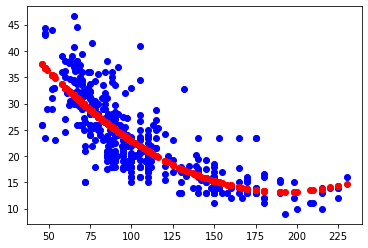

In [35]:
%matplotlib inline
plt.plot(x, y, "bo")
plt.plot(x, polyreg.predict(x[:, np.newaxis]), "ro")


## El problema de los outliers
> Aquellos datos muy alejados de los demás, estos datos pueden 